In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [71]:
len(df)

9879

In [72]:
len(df.columns)

40

In [15]:
diffcols = [c for c in df.columns if 'diff' in c.lower()]
diffcols

['blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff', 'redExperienceDiff']

In [16]:
onlyBlueCols = [c for c in df.columns if 'blue' in c.lower()]
onlyBlueCols

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

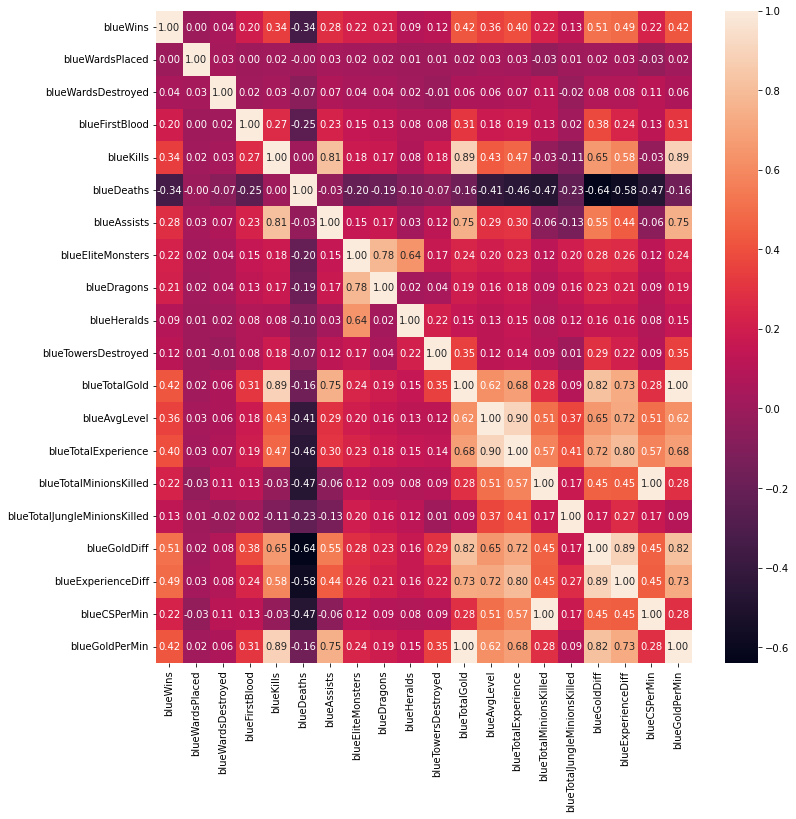

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[onlyBlueCols].corr(), annot=True, fmt=".2f")
plt.show()

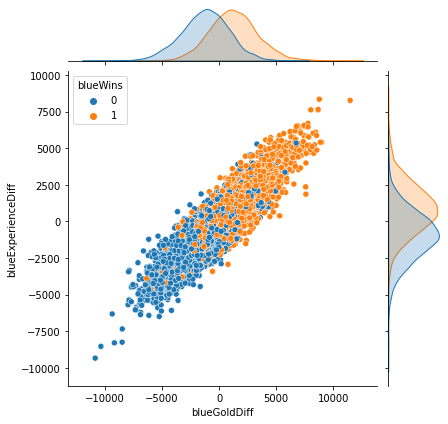

In [18]:
sns.jointplot(data=df, x="blueGoldDiff", y="blueExperienceDiff", hue="blueWins")
plt.show()

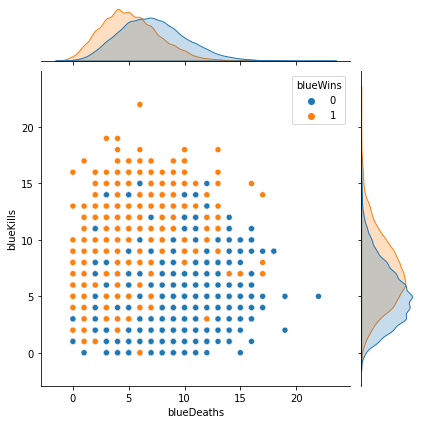

In [19]:
sns.jointplot(data=df, x="blueDeaths", y="blueKills", hue="blueWins")
plt.show()

/tmp/ipykernel_9195/1388276473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["goldDiff"] = df["blueGoldDiff"]
/tmp/ipykernel_9195/1388276473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["expDiff"] = df["blueExperienceDiff"]
/tmp/ipykernel_9195/1388276473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

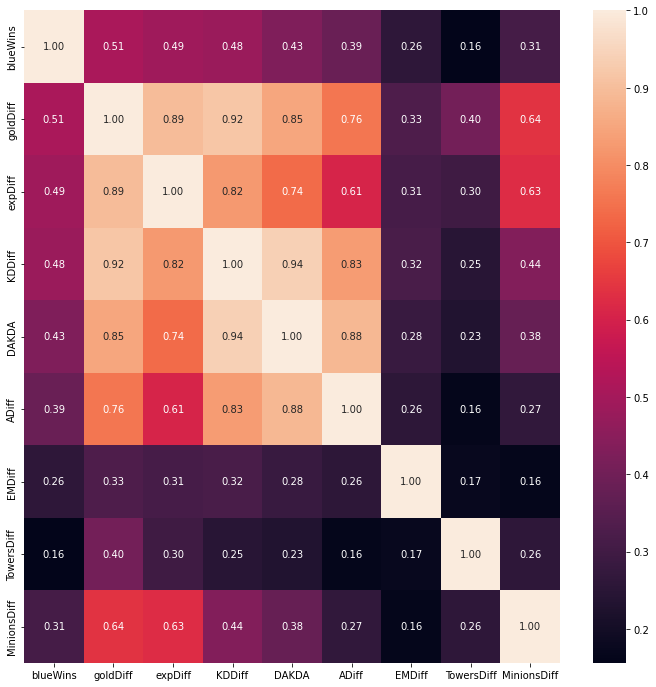

In [20]:
features = df[['blueWins']]

features["goldDiff"] = df["blueGoldDiff"]
features["expDiff"] = df["blueExperienceDiff"]
features["KDDiff"] = df["blueKills"] - df["blueDeaths"]
features["DAKDA"] = (df["blueKills"] + df["blueAssists"]) * df["redDeaths"] - (df["redKills"] + df["redAssists"]) * df["blueDeaths"]
features["ADiff"] = df["blueAssists"] - df["redAssists"]
features["EMDiff"] = df["blueEliteMonsters"] - df["redEliteMonsters"]
features["TowersDiff"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
features["MinionsDiff"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]

plt.figure(figsize=(12, 12))
sns.heatmap(features.corr(), annot=True, fmt=".2f")
plt.show()

In [73]:
features.describe()

,blueWins,goldDiff,expDiff,KDDiff,DAKDA,ADiff,EMDiff,TowersDiff,MinionsDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,14.414111,-33.620306,0.046260,1.611499,-0.017006,-0.023180,0.008402,-0.649661
std,0.500024,2453.349179,1920.370438,4.195489,131.513451,5.766787,1.067934,0.324835,30.942675
min,0.000000,-10830.000000,-9333.000000,-17.000000,-753.000000,-25.000000,-2.000000,-2.000000,-120.000000
25%,0.000000,-1585.500000,-1290.500000,-3.000000,-65.000000,-4.000000,-1.000000,0.000000,-21.000000
50%,0.000000,14.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,1.000000,1596.000000,1212.000000,3.000000,68.000000,4.000000,1.000000,0.000000,20.000000
max,1.000000,11467.000000,8348.000000,16.000000,1032.000000,23.000000,2.000000,4.000000,127.000000


In [361]:
features.EMDiff.value_counts()

EMDiff
 0    2928
-1    2850
 1    2661
-2     730
 2     710
Name: count, dtype: int64

In [362]:
features.TowersDiff.value_counts()

TowersDiff
 0    9064
 1     406
-1     347
 2      28
-2      27
 3       6
 4       1
Name: count, dtype: int64

### Description

League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off.

The game is about

- killing:

    - enemy players

    - minions

    - monsters in the jungle (some of them are elite: Dragons, Heralds)
    
- destroying buildings of enemy team.


Every kill or structure destruction gives both gold for a player or entire team, and experience for a player such that they can gain bigger level.
Every player gets one kill (K) while finishing enemy, one death (D) while dying (most often from an enemy) and assist (A) while helping teammate with kill.

The ultimate aim of the game is to destroy enemy main building.


In [21]:
features.drop('blueWins', axis=1).values.shape

(9879, 8)

In [22]:
features['blueWins'].values.astype(int).shape

(9879,)

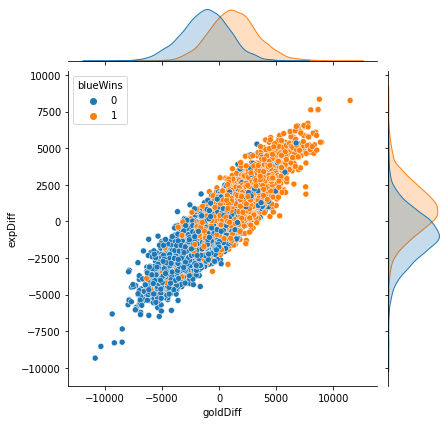

In [23]:
sns.jointplot(data=features, x="goldDiff", y="expDiff", hue="blueWins")
plt.show()

## Prior predictive check for Probit model

In [364]:
!cat models/probit_ppc.stan

In [316]:
from cmdstanpy import CmdStanModel

probit_ppc = CmdStanModel(stan_file='models/probit_ppc.stan')

23:38:47 - cmdstanpy - INFO - compiling stan file /home/models/probit_ppc.stan to exe file /home/models/probit_ppc
23:38:57 - cmdstanpy - INFO - compiled model executable: /home/models/probit_ppc


In [317]:
ppc_data = probit_ppc.sample(iter_sampling=100)

23:39:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:39:20 - cmdstanpy - INFO - CmdStan done processing.


In [318]:
probit_ppc_df = ppc_data.draws_pd()
probit_ppc_df.head()

,lp__,accept_stat__,alpha,beta_gold,beta_exp,beta_dakda,beta_em,beta_minions,beta_towers,goldDiff,expDiff,DAKDA,EMDiff,minionsDiff,towersDiff,eta,p,gameWon_pred
0,0.0,0.0,-0.136913,0.529772,-0.536421,0.243558,-0.217100,-1.624940,0.248530,-3.636090,4.243680,2.671170,-0.44684,-1.44873,-4.50934,-2.35862,9.171520e-03,0.0
1,0.0,0.0,-0.905607,-0.862141,-0.465319,-0.262021,-0.660918,-0.948564,-0.075158,1.723710,0.749765,0.873407,2.39424,-1.53124,-1.55021,-2.98282,1.428020e-03,0.0
2,0.0,0.0,0.374873,0.271285,-0.672912,-1.375310,-1.141580,-0.354608,-1.163040,3.261940,-1.044840,3.293290,1.72842,1.23333,-2.18573,-2.43481,7.449860e-03,0.0
3,0.0,0.0,1.562240,-1.204970,-0.809153,-1.109770,-1.095120,-0.140054,-0.044417,1.281580,-0.507810,4.703330,3.51881,-4.25244,-1.83054,-7.96739,8.103300e-16,0.0
4,0.0,0.0,1.393760,-0.117519,0.152657,1.228880,2.017980,0.466037,-1.003530,0.729703,-4.384810,2.742940,-0.37682,1.04658,-1.59085,5.33317,1.000000e+00,1.0


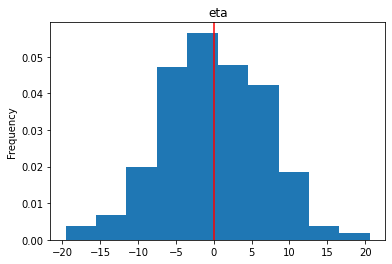

In [319]:
probit_ppc_df.eta.plot.hist(bins=10, density=True)
plt.axvline(probit_ppc_df.eta.mean(), c="r")
plt.title("eta")
plt.show()

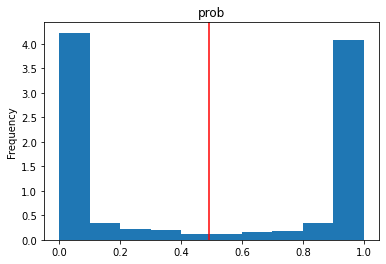

In [320]:
probit_ppc_df.p.plot.hist(bins=10, density=True)
plt.axvline(probit_ppc_df.p.mean(), c="r")
plt.title("prob")
plt.show()

## Posterior predictive check for Probit model

In [366]:
from cmdstanpy import CmdStanModel

probit_posterior = CmdStanModel(stan_file='models/probit_posterior.stan')

12:21:10 - cmdstanpy - INFO - compiling stan file /home/models/probit_posterior.stan to exe file /home/models/probit_posterior
12:21:23 - cmdstanpy - INFO - compiled model executable: /home/models/probit_posterior
12:21:23 - cmdstanpy - WARNING - Stan compiler has produced 8 warnings:
12:21:23 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/models/probit_posterior.hpp /home/models/probit_posterior.stan
Warning in '/home/models/probit_posterior.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/probit_posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type.

In [368]:
features.columns

Index(['blueWins', 'goldDiff', 'expDiff', 'KDDiff', 'DAKDA', 'ADiff', 'EMDiff',
       'TowersDiff', 'MinionsDiff'],
      dtype='object')

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = features[['goldDiff', 'expDiff', 'DAKDA', 'EMDiff', 'MinionsDiff', 'TowersDiff']]
y = features['blueWins'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=28062023)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [370]:
y_train.shape

(6586,)

In [371]:
data = {
    'N': len(y_train),
    'gameWon': y_train,
    'goldDiff': X_train[:, 0],
    'expDiff': X_train[:, 1],
    'DAKDA': X_train[:, 2],
    'EMDiff': X_train[:, 3],
    'minionsDiff': X_train[:, 4],
    'towersDiff': X_train[:, 5]
    
}

fit_probit = probit_posterior.sample(data=data, iter_warmup=100, iter_sampling=100, seed=28062023)

print(fit_probit.summary())


12:24:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:24:34 - cmdstanpy - INFO - CmdStan done processing.



                           Mean      MCSE    StdDev           5%          50%  \
lp__               -3488.140000  0.137319  1.757220 -3491.460000 -3487.920000   
alpha                 -0.004601  0.000963  0.017940    -0.034341    -0.005778   
beta_gold              0.739756  0.005683  0.068797     0.628103     0.736936   
beta_exp               0.292608  0.003265  0.041023     0.225084     0.293955   
beta_dakda             0.106523  0.002376  0.036802     0.044326     0.108878   
...                         ...       ...       ...          ...          ...   
gameWon_pred[6582]     0.392500  0.027415  0.488919     0.000000     0.000000   
gameWon_pred[6583]     0.595000  0.027631  0.491507     0.000000     1.000000   
gameWon_pred[6584]     0.240000  0.021489  0.427618     0.000000     0.000000   
gameWon_pred[6585]     0.460000  0.026544  0.499022     0.000000     0.000000   
gameWon_pred[6586]     0.867500  0.016103  0.339458     0.000000     1.000000   

                          

In [372]:
probit_posterior_df = fit_probit.draws_pd()

In [377]:
alpha = probit_posterior_df.alpha.mean()
beta = probit_posterior_df.loc[:, "beta_gold":"beta_towers"].values.mean(axis=0)
alpha, beta

(-0.00460113622,
 array([ 0.73975623,  0.29260828,  0.10652346, -0.13845854,  0.09950787,
         0.09942914]))

In [378]:
beta.shape

(6,)

In [380]:
X_train.shape

(6586, 6)

### Train accuracy

In [383]:
import numpy as np
lin_comb = alpha + np.inner(beta, X_train)

In [385]:
lin_comb.shape

(6586,)

In [386]:
from scipy.stats import norm
probability = norm.cdf(lin_comb)
pred = [1 if p > 0.5 else 0 for p in probability]

In [387]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred)

0.7140904949893714

### Test accuracy 

In [388]:
X_test = scaler.transform(X_test)

In [389]:
lin_comb = alpha + np.inner(beta, X_test)

In [390]:
probability = norm.cdf(lin_comb)
pred = [1 if p > 0.5 else 0 for p in probability]

In [391]:
accuracy_score(y_test, pred)

0.7163680534467052

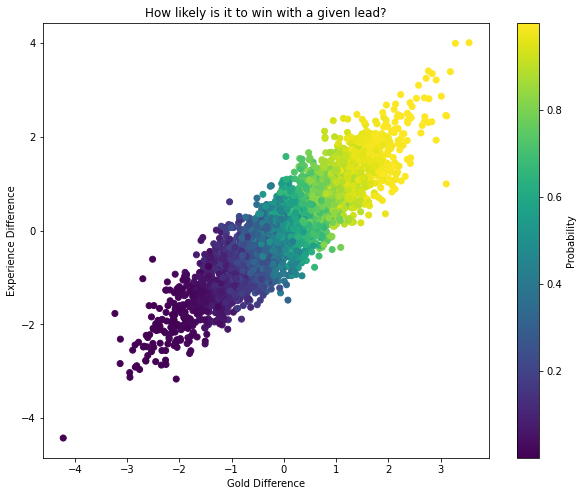

In [392]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=probability, cmap='viridis')
plt.colorbar(label='Probability')
plt.xlabel('Gold Difference')
plt.ylabel('Experience Difference')
plt.title('How likely is it to win with a given lead?')
plt.show()

In [393]:
falsePreds = (y_test != pred)

In [394]:
X_test[falsePreds, :].shape

(934, 6)

In [395]:
falseX = X_test[falsePreds, :]

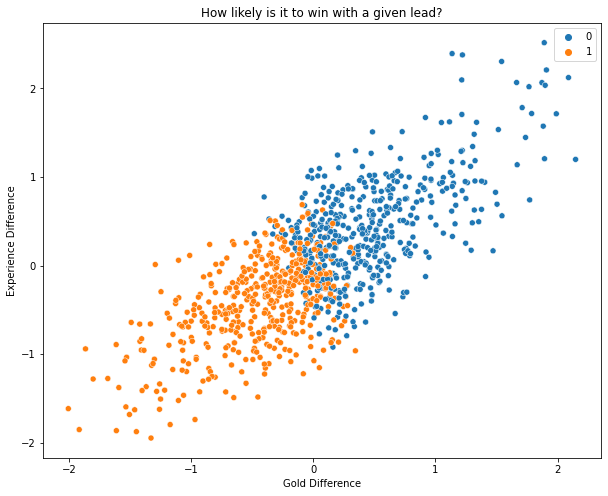

In [396]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=falseX[:, 0], y=falseX[:, 1], hue=y_test[falsePreds])
plt.xlabel('Gold Difference')
plt.ylabel('Experience Difference')
plt.title('How likely is it to win with a given lead?')
plt.show()

## Prior predictive check for Logit model

In [264]:
from cmdstanpy import CmdStanModel

logit_ppc = CmdStanModel(stan_file='models/logit_ppc.stan')

In [363]:
!cat models/logit_ppc.stan

In [265]:
ppc_data = logit_ppc.sample(iter_sampling=100)

23:23:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:23:02 - cmdstanpy - INFO - CmdStan done processing.


In [266]:
logit_ppc_df = ppc_data.draws_pd()
logit_ppc_df.head()

,lp__,accept_stat__,alpha,beta_gold,beta_exp,beta_dakda,goldDiff,expDiff,DAKDA,eta,p,gameWon_pred
0,0.0,0.0,1.186240,1.021880,-0.882727,0.803263,-1.13117,-1.933230,-0.47810,1.352790,0.794585,0.0
1,0.0,0.0,1.451410,-1.462330,-0.108714,0.168732,4.34699,-3.802490,1.18930,-4.291260,0.013503,0.0
2,0.0,0.0,0.924117,0.158551,-0.125576,-1.029590,2.59602,1.666240,1.51779,-0.436221,0.392642,1.0
3,0.0,0.0,-1.061850,0.869055,1.335890,0.848455,1.01649,-0.277422,4.62473,3.374800,0.966908,1.0
4,0.0,0.0,-0.755796,0.152600,2.517070,-1.614270,4.81097,-4.340600,1.02175,-12.596600,0.000003,0.0


In [267]:
import arviz as az

az.summary(ppc_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.049,0.975,-1.913,1.753,0.047,0.035,431.0,374.0,1.00
beta_gold,0.100,1.027,-1.682,2.022,0.051,0.039,401.0,402.0,1.00
beta_exp,0.004,1.006,-1.630,2.070,0.048,0.034,444.0,417.0,1.00
beta_dakda,-0.051,1.004,-1.871,1.866,0.052,0.036,383.0,398.0,1.01
goldDiff,-0.079,2.799,-4.835,4.397,0.141,0.101,390.0,367.0,1.00
expDiff,-0.083,2.827,-4.231,4.932,0.128,0.095,459.0,411.0,1.00
DAKDA,-0.128,2.909,-4.851,4.483,0.142,0.100,433.0,412.0,1.00
eta,0.285,4.976,-10.545,8.635,0.236,0.182,439.0,412.0,1.00
p,0.533,0.408,0.000,1.000,0.020,0.014,439.0,412.0,1.00
gameWon_pred,0.540,0.499,0.000,1.000,0.024,0.017,417.0,400.0,1.00


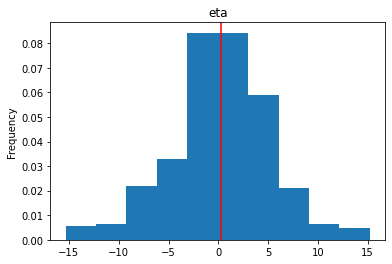

In [284]:
logit_ppc_df.eta.plot.hist(bins=10, density=True)
plt.axvline(logit_ppc_df.eta.mean(), c="r")
plt.title("eta")
plt.show()

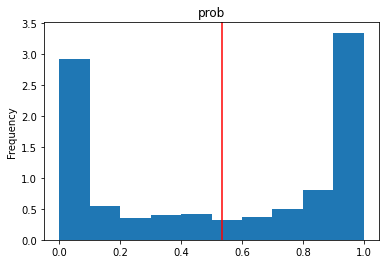

In [285]:
logit_ppc_df.p.plot.hist(bins=10, density=True)
plt.axvline(logit_ppc_df.p.mean(), c="r")
plt.title("prob")
plt.show()

## Posterior predictive check for Logit model

In [294]:
from cmdstanpy import CmdStanModel

logit_posterior = CmdStanModel(stan_file='models/logit_posterior.stan')

23:27:32 - cmdstanpy - INFO - compiling stan file /home/models/logit_posterior.stan to exe file /home/models/logit_posterior
23:27:44 - cmdstanpy - INFO - compiled model executable: /home/models/logit_posterior
23:27:44 - cmdstanpy - WARNING - Stan compiler has produced 5 warnings:
23:27:44 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/models/logit_posterior.hpp /home/models/logit_posterior.stan
Warning in '/home/models/logit_posterior.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/logit_posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This c

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = features[['goldDiff', 'expDiff', 'DAKDA']]
y = features['blueWins'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=28062023)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [296]:
data = {
    'N': len(y_train),
    'gameWon': y_train,
    'goldDiff': X_train[:, 0],
    'expDiff': X_train[:, 1],
    'DAKDA': X_train[:, 2]
}

fit_logit = logit_posterior.sample(data=data, iter_warmup=100, iter_sampling=100, seed=28062023)

print(fit_logit.summary())

23:27:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:27:48 - cmdstanpy - INFO - CmdStan done processing.



                           Mean      MCSE    StdDev           5%          50%  \
lp__               -3530.980000  0.104145  1.473150 -3534.100000 -3530.590000   
alpha                 -0.006522  0.001218  0.031089    -0.061007    -0.005168   
beta_gold              0.988852  0.006885  0.088351     0.837755     0.990083   
beta_exp               0.507765  0.005065  0.069269     0.389944     0.506075   
beta_dakda             0.009859  0.004111  0.060194    -0.097394     0.015252   
...                         ...       ...       ...          ...          ...   
gameWon_pred[6582]     0.335000  0.025428  0.472582     0.000000     0.000000   
gameWon_pred[6583]     0.645000  0.024029  0.479113     0.000000     1.000000   
gameWon_pred[6584]     0.220000  0.019715  0.414765     0.000000     0.000000   
gameWon_pred[6585]     0.562500  0.026540  0.496700     0.000000     1.000000   
gameWon_pred[6586]     0.855000  0.017330  0.352542     0.000000     1.000000   

                          

In [297]:
logit_posterior_df = fit_logit.draws_pd()

In [298]:
logit_posterior_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_gold,beta_exp,...,gameWon_pred[6577],gameWon_pred[6578],gameWon_pred[6579],gameWon_pred[6580],gameWon_pred[6581],gameWon_pred[6582],gameWon_pred[6583],gameWon_pred[6584],gameWon_pred[6585],gameWon_pred[6586]
0,-3530.47,0.806626,0.027604,2.0,7.0,0.0,3532.33,0.019066,0.870320,0.608067,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,-3529.82,0.826093,0.027604,3.0,11.0,0.0,3532.67,-0.035960,0.960865,0.493593,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,-3529.89,0.680881,0.027604,2.0,7.0,0.0,3532.51,0.018343,1.003550,0.456247,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,-3529.90,0.860576,0.027604,2.0,7.0,0.0,3531.46,-0.032059,1.072000,0.501201,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,-3530.65,0.778320,0.027604,3.0,15.0,0.0,3532.04,0.021249,1.080450,0.413866,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [299]:
len(logit_posterior_df)

400

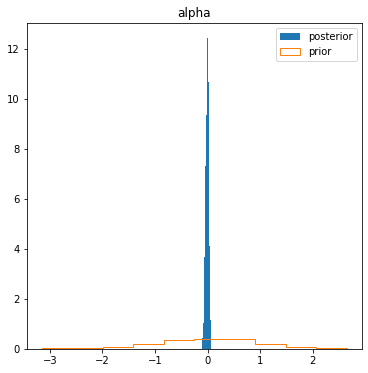

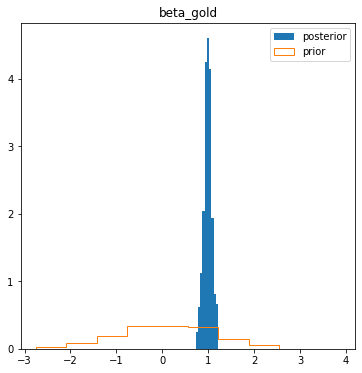

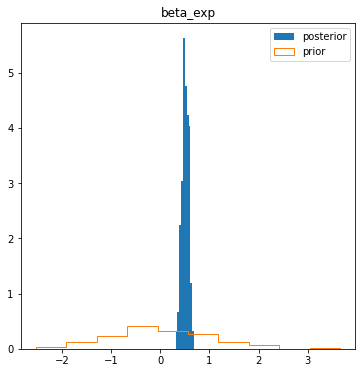

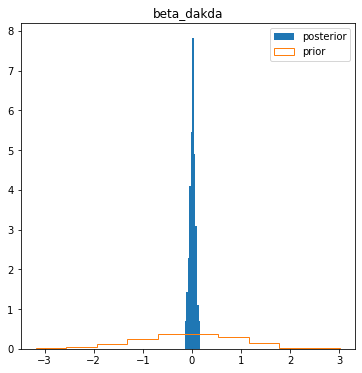

In [409]:
for param in ("alpha", "beta_gold", "beta_exp", "beta_dakda"):
    plt.figure(figsize=(6, 6))
    plt.hist(logit_posterior_df[param], bins=10, label="posterior", density=True)
    plt.hist(logit_ppc_df[param], bins=10, histtype='step', label="prior", density=True)
    plt.title(param)
    plt.legend()

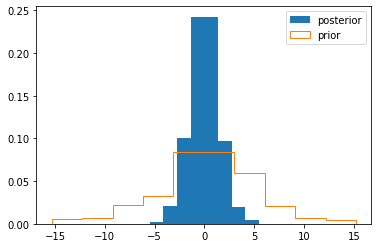

In [301]:
posterior_etas = logit_posterior_df.loc[:, "eta[1]":f"eta[{len(y_train)}]"].mean()
plt.hist(posterior_etas, bins=10, label="posterior", density=True)
plt.hist(logit_ppc_df['eta'], bins=10, histtype='step', label="prior", density=True)
plt.legend()

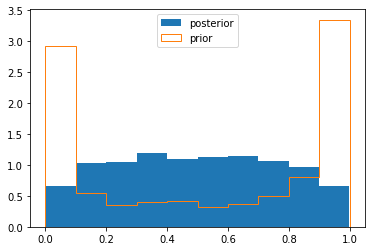

In [302]:
posterior_probs = logit_posterior_df.loc[:, "p[1]":f"p[{len(y_train)}]"].mean()
plt.hist(posterior_probs, bins=10, label="posterior", density=True)
plt.hist(logit_ppc_df['p'], bins=10, histtype='step', label="prior", density=True)
plt.legend()

In [303]:
alpha = logit_posterior_df.alpha.mean()
beta1 = logit_posterior_df.beta_gold.mean()
beta2 = logit_posterior_df.beta_exp.mean()
beta3 = logit_posterior_df.beta_dakda.mean()
alpha, beta1, beta2, beta3

(-0.006521933107500001, 0.9888520225, 0.50776528, 0.00985932836825)

In [304]:
X_test = scaler.transform(X_test)

In [305]:
import numpy as np

In [306]:
def logit(alpha, beta_gold, beta_exp, beta_dakda, gold_diff, exp_diff, dakda):
    eta = alpha + beta_gold * gold_diff + beta_exp * exp_diff + beta_dakda * dakda
    p = 1 / (1 + np.exp(-eta))
    return p > 0.5

In [307]:
pred = logit(alpha, beta1, beta2, beta3, X_test[:, 0], X_test[:, 1], X_test[:, 2])
pred.shape

(3293,)

In [308]:
accuracy_score(y_test, pred)

0.7251746128150622

## Model comparison

In [397]:
import arviz as az

In [398]:
idata_probit = az.from_cmdstanpy(posterior=fit_probit)
idata_logit = az.from_cmdstanpy(posterior=fit_logit)

In [399]:
idata_probit

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [400]:
model_dict = {"Probit model": idata_probit, "Logit model": idata_logit}
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)

              rank     elpd_loo     p_loo  elpd_diff    weight         se  \
Probit model     0  6982.797327  7.111214   0.000000  0.963422  77.860527   
Logit model      1  7064.996294  4.243859  82.198967  0.036578  77.068225   

                    dse  warning     scale  
Probit model   0.000000    False  deviance  
Logit model   18.779629    False  deviance  


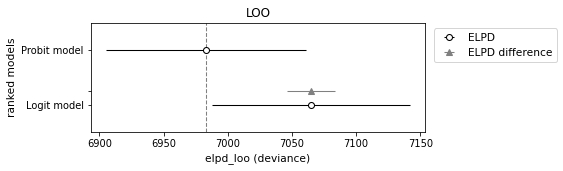

In [401]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

In [406]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

              rank    elpd_waic    p_waic  elpd_diff    weight         se  \
Probit model     0  6982.657343  7.041221   0.000000  0.963773  77.857800   
Logit model      1  7064.916997  4.204211  82.259654  0.036227  77.066742   

                    dse  warning     scale  
Probit model   0.000000    False  deviance  
Logit model   18.779338    False  deviance  


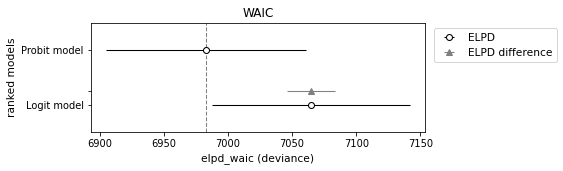

In [407]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()